In [3]:
%pip install pandas
%pip install torch
%pip install numpy
%pip install sklearn
%pip install scikit-learn
%pip install pulearn
%pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use c

Root Failure Accuracy: 87.42%
Stem Failure Accuracy: 71.52%
Branch Failure Accuracy: 82.78%

Root Failure Confusion Matrix:
[[92  6]
 [13 40]]

Stem Failure Confusion Matrix:
[[85 21]
 [22 23]]

Branch Failure Confusion Matrix:
[[85 13]
 [13 40]]


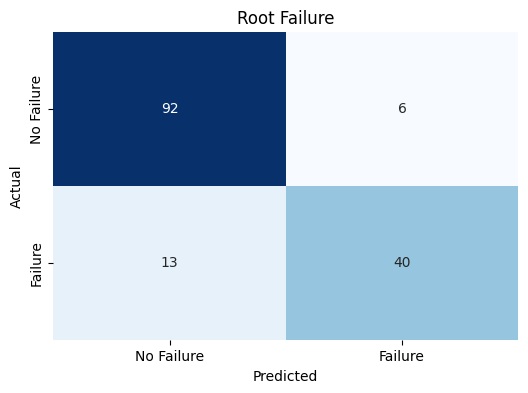

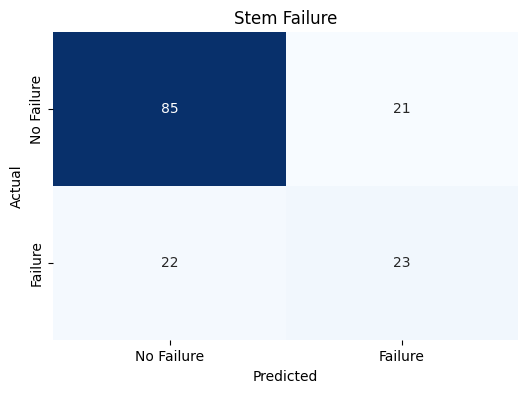

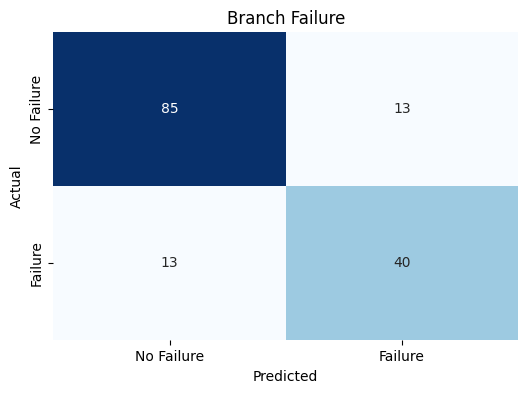

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
df = pd.read_csv("treedata.csv")
df = df.drop(columns=["ObjectID", "Other.1"])

# One-hot encode categorical columns
categorical_cols = ["Tree Species", "Condition", "Site Factors", "Type of Soil", 
                   "Weather factors", "Failed Part", "Root Failure", "Stem Failure", 
                   "Branch Failure", "Location and Percentage of Decay", "Decay Present"]
df = pd.get_dummies(df, columns=categorical_cols)

# Convert one-hot encoded columns to integers
one_hot_cols = [col for col in df.columns if col.startswith(tuple(categorical_cols))]
df[one_hot_cols] = df[one_hot_cols].astype(int)

# Prepare features and targets
X = df.drop(columns=["Failed Part_BranchFailure", "Failed Part_RootFailure", "Failed Part_StemFailure"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def train_logistic_model(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create and train model
    model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
    model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, confusion_matrix(y_test, y_pred)

# Train models for each failure type
root_accuracy, root_cm = train_logistic_model(X_scaled, df['Failed Part_RootFailure'])
stem_accuracy, stem_cm = train_logistic_model(X_scaled, df['Failed Part_StemFailure'])
branch_accuracy, branch_cm = train_logistic_model(X_scaled, df['Failed Part_BranchFailure'])

# Print results
print(f"Root Failure Accuracy: {root_accuracy:.2%}")
print(f"Stem Failure Accuracy: {stem_accuracy:.2%}")
print(f"Branch Failure Accuracy: {branch_accuracy:.2%}\n")

print("Root Failure Confusion Matrix:")
print(root_cm)
print("\nStem Failure Confusion Matrix:")
print(stem_cm)
print("\nBranch Failure Confusion Matrix:")
print(branch_cm)

# Visualization function (same as before)
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Failure", "Failure"], 
                yticklabels=["No Failure", "Failure"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(root_cm, "Root Failure")
plot_confusion_matrix(stem_cm, "Stem Failure")
plot_confusion_matrix(branch_cm, "Branch Failure")